<a href="https://colab.research.google.com/github/shambhavi1708/disease-detection-system/blob/main/Cardiovascular_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv(r'/content/heart_disease_data.csv')

In [19]:
# View Dataset before Cleaning
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Check for Missing Values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [21]:
# Handling Missing Values
df.fillna(df.median(), inplace=True)

In [22]:
# View Dataset After Cleaning
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
x = df.drop(['target'], axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

svm_model = SVC(kernel='linear', probability=True, random_state=0)
svm_model.fit(x_train, y_train)

log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(x_train, y_train)


LogisticRegression(max_iter=1000, random_state=0)

In [26]:
train_accuracy_rf = accuracy_score(y_train, rf.predict(x_train)) * 100
test_accuracy_rf = accuracy_score(y_test, rf.predict(x_test)) * 100
train_accuracy_svm = accuracy_score(y_train, svm_model.predict(x_train)) * 100
test_accuracy_svm = accuracy_score(y_test, svm_model.predict(x_test)) * 100
train_accuracy_log = accuracy_score(y_train, log_reg.predict(x_train)) * 100
test_accuracy_log = accuracy_score(y_test, log_reg.predict(x_test)) * 100

In [27]:
rf_accuracy = accuracy_score(y_test, rf.predict(x_test)) * 100
svm_accuracy = accuracy_score(y_test, svm_model.predict(x_test)) * 100
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(x_test)) * 100


print("\nModel Accuracy Scores:")
print(f"- Random Forest Accuracy: {rf_accuracy:.2f}%")
print(f"- SVM Accuracy: {svm_accuracy:.2f}%")
print(f"- Logistic Regression Accuracy: {log_reg_accuracy:.2f}%")


Model Accuracy Scores:
- Random Forest Accuracy: 86.89%
- SVM Accuracy: 81.97%
- Logistic Regression Accuracy: 85.25%


<ipython-input-31-cd3240f97e18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='viridis')


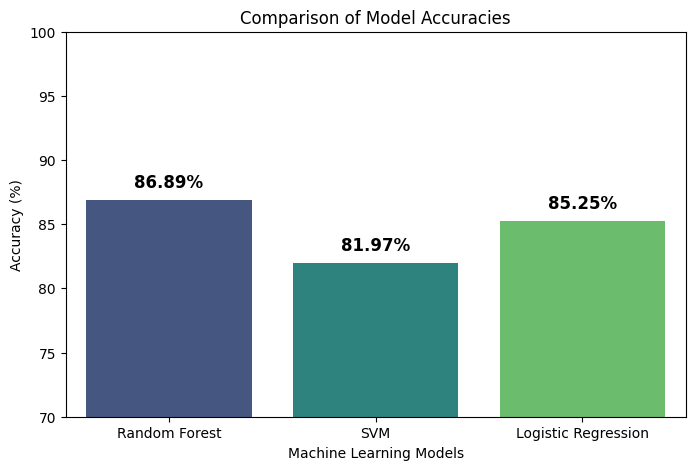

In [31]:
models = ['Random Forest', 'SVM', 'Logistic Regression']
accuracy_scores = [rf_accuracy, svm_accuracy, log_reg_accuracy]
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracies")
plt.ylim(70, 100)
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12, fontweight='bold')
plt.show()


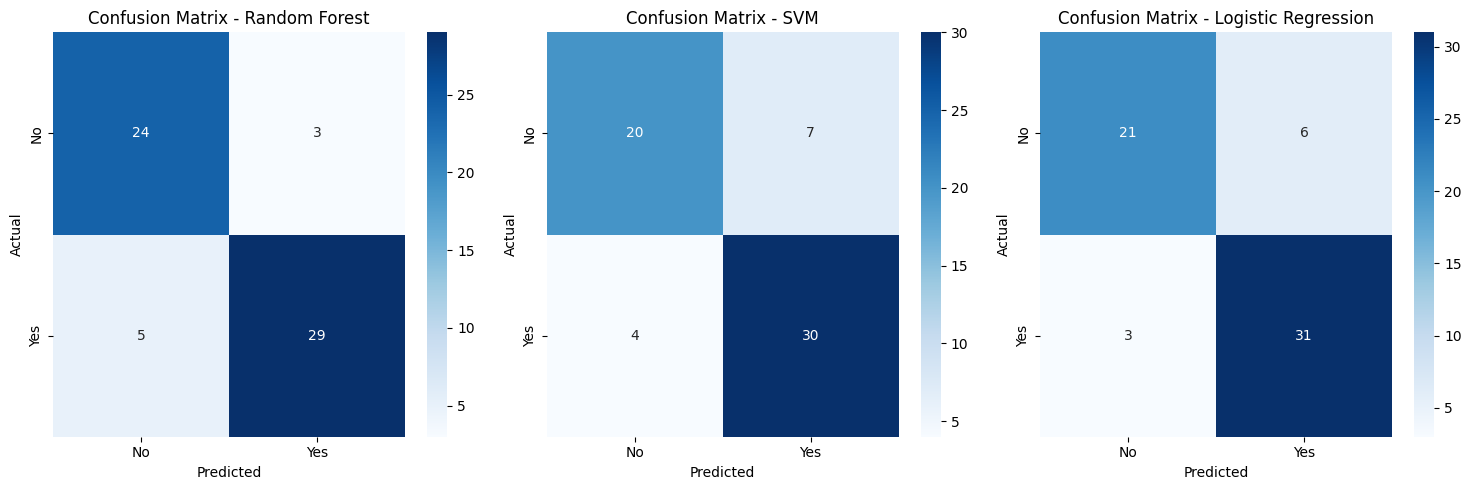

In [28]:
# Confusion Matrices
models = {"Random Forest": rf, "SVM": svm_model, "Logistic Regression": log_reg}
plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model.predict(x_test))
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")

plt.tight_layout()
plt.show()

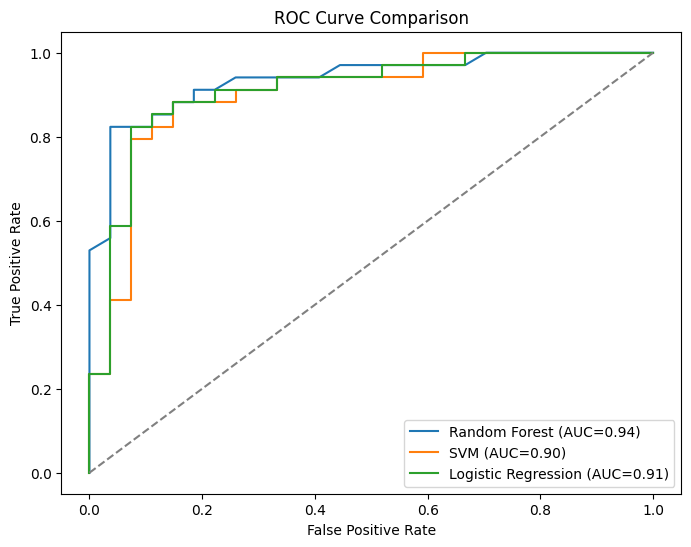

In [29]:
# ROC Curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()